<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Неявный метод Эйлера

### Modules - Ordinary Differential Equations
<section class="post-meta">
By Henning G. Hugdal, Magnus H-S Dahle, Håkon W. Ånes and Peter Berg
</section>
Last edited: March 11th 2018 
___

Мы уже видели один метод решения обыкновенных дифференциальных уравнений (ОДУ) вида
$$\frac{d}{dx}x(t) = g(x(t),t),~~~x(t_0)=x_0,$$
а именно __явный метод Эйлера__, или просто метод Эйлера. Там сначала дискретизируется время $$t_n = t_0 + n \Delta t \, n=0,1...,N,$$
где
$$\Delta t = \frac{t_N-t_0}{N}.$$ Затем аппроксимируется производная по времени $x(t)$ в момент времени $t_n$, используя прямое разностное приближение,
$$\frac{dx}{dt}\Big|_{t=t_n}\approx \frac{x(t_{n+1})-x(t_n)}{\Delta t},~~~~~\Delta t>0.$$
Затем это подставляется в ОДУ, оценивая $g(x,t)$ в точке $x(t_n)$ и время $t_n$.

В __неявном методе Эйлера__ (или обратном методе Эйлера) вычисляется $g(x, t)$ с использованием <u>нового шага во времени $t_{n+1}$</u>, и, следовательно, также используя $x(t_{n+1})$, значение которого неизвестно! Затем мы получаем следующую формулу
$$x_{n+1}= x_n +\Delta t \cdot g(x_{n+1},t_{n+1}),$$
где мы ввели обозначение $x_n \equiv x(t_n)$.

Мы сразу понимаем, что это может быть не так просто, как для явного метода Эйлера, шде мы использовали простую итерационную формулу. Однако здесь это не так, так как нам нужно будет найти корень функции
$$f(x_{n+1}) = x_{n+1}-  x_n -\Delta t \cdot g(x_{n+1},t_{n+1})$$
для того, чтобы определить $x_n$. Давайте проиллюстрируем это на примере.

__Пример:__

Мы хотим решить
$$\frac{d}{dt}x(t)=\cos(x(t))+\sin(t), \,x(t_0=0)=0,$$
используя неявный метод Эйлера. Это дает
$$x_{n+1} = x_n + \Delta t\left(\cos(x_{n+1})+\sin(t_{n+1})\right),$$
и мы хотим найти значения $x_{n+1}$ такие, что
$$f(x_{n+1}) = x_{n+1} - x_n - \Delta t\left(\cos(x_{n+1})+\sin(t_{n+1})\right) = 0.$$
Код, необходимый для решения этой проблемы, реализован ниже, и результат показан на графике. Для сравнения с явным методом Эйлера мы будем использовать тот же размер шага. Поскольку нам нужно найти корень функции, мы сначала реализуем метод Ньютона.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Set common figure parameters
newparams = {'figure.figsize': (16, 6), 'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [2]:
def newton(x_old, t_new, dt, precision=1e-12):
    """ Принимает значения x_old и t_new и находит корень
    функции f(x_new), возвращая x_new. """
    
    # initial guess:
    x_new = x_old
    f = func(x_new, x_old, t_new, dt)
    dfdx = dfuncdx(x_new, dt)
    
    while abs(f/dfdx) > precision:
        x_new = x_new - f/dfdx
        f = func(x_new, x_old, t_new, dt)
        dfdx = dfuncdx(x_new, dt)
        
    return x_new
    
def func(x_new, x_old, t_new, dt):
    """ Функция f(x), корень которой нам нужен."""
    return x_new - x_old - dt*(np.cos(x_new) + np.sin(t_new))

def dfuncdx(x_new, dt):
    """ Производная от f(x) в точке x_new."""
    return 1+dt*np.sin(x_new)

x_N = 1.742352


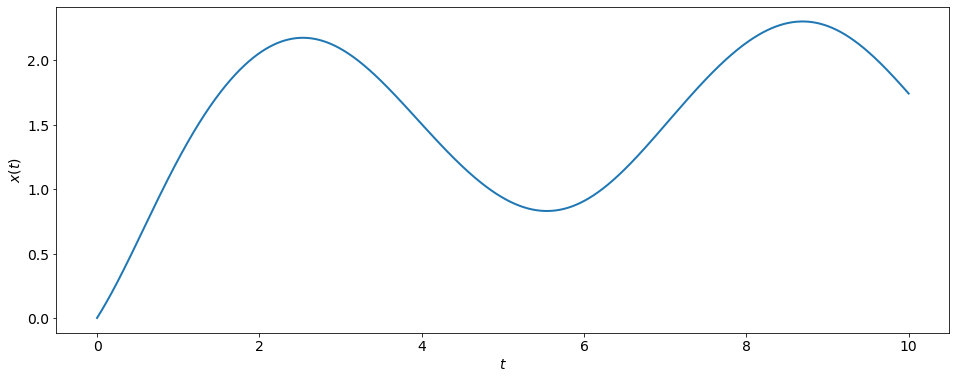

In [5]:
dt = 0.001  # размер шага
t_max = 10  # максимальное время
N = int(t_max/dt)

t = np.linspace(0, t_max, N+1)
x = np.zeros(N+1)

# установить начальное значение
x[0] = 0

for n in range(N):
    x[n+1] = newton(x[n], t[n+1], dt)

print(r'x_N = %f' % x[-1])
    
plt.plot(t,x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid();

Мы видим, что это очень похоже на результат, полученный с помощью явного метода Эйлера.

#### Точность и стабильность:

Как и явный метод Эйлера, неявный метод является методом первого порядка. Это означает, что __глобальная ошибка усечения__ пропорциональна размеру шага $\Delta t$. То есть, если разделить $\Delta t$ на два, ошибка усечения также будет уменьшена вдвое.

Давайте также рассмотрим устойчивость неявного метода Эйлера, рассмотрев ОДУ
$$\frac{dx(t)}{dt} = -x, ~~\mathrm{with}~~ x(0) = 1.$$
Точное решение равно $x(t) = e^{-t}$. Для явного метода Эйлера мы обнаружили, что метод был устойчив только для $0<\Delta t<1$. Однако для неявного метода мы получаем:
$$
\begin{align}
x_{n+1} &= x_n - \Delta t \cdot x_{n+1} \\
x_{n+1} &= \frac{x_n}{1+\Delta t}\leq x_n\, \mathrm{for} \, \Delta t\geq 0.
\end{align}
$$
Следовательно, мы видим, что неявный метод Эйлера может быть безусловно устойчивым для определенных ОД, как и для приведенного выше. Однако это не всегда так!

Помните, что даже если метод стабилен, точность может быть не очень хорошей. Чтобы проиллюстрировать это, мы решим приведенный выше пример ОДУ для различных значений $\Delta t$ и сравним с точным решением. Обратите внимание, что в этом случае нам не нужно нахождение корня, так как решение тривиально в рассматриваемом здесь случае.

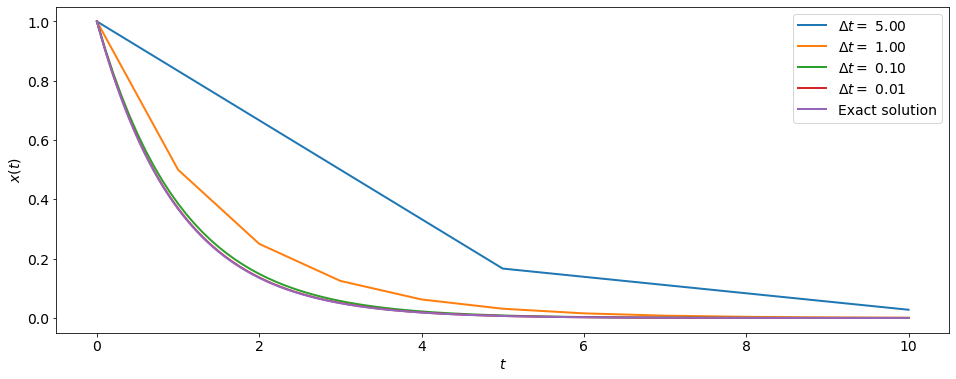

In [6]:
dts = np.array([5, 1, 0.1, 0.01])
t_max = 10

plt.figure()
for i, dt in enumerate(dts):
    N = int(t_max/dt)
    t = np.linspace(0, t_max, N+1)
    x = np.zeros(N+1)
    x[0] = 1
    
    for n in range(N):
        x[n+1] = x[n]/(1+dt)
    
    # Построит график решения
    plt.plot(t,x)

# Построить точное решение
plt.plot(t, np.exp(-t))
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.legend([r'$\Delta t=$ %0.2f' % dts[0], r'$\Delta t=$ %0.2f' % dts[1], r'$\Delta t=$ %0.2f' % dts[2],
            r'$\Delta t=$ %0.2f' % dts[3], r'Exact solution'])
plt.grid();

Мы видим, что все решения стабильны, и что точность увеличивается с уменьшением $\Delta t$.